# **Milestone 2**

# Link of Model Deployment
Click [the following link](https://huggingface.co/spaces/AldaTalenta/non-and-biodegradable-material-image-classifications) to go directly to this webapps project.

# i. Perkenalan

>Bab pengenalan ini berisi identitas, gambaran besar dataset yang digunakan, dan objective yang ingin dicapai.

## Identity

### Alda Nesti Talenta Pakpahan <br>
### FTDS-018-RMT

## Identifikasi Masalah

### Topik permasalahan

Topik permasalahan yang akan dibahas dalam notebook ini adalah ***Image Classifications***.

### Problem statement

Beberapa negara ingin memaksimalkan pengolahan limbah dengan bantuan teknologi `Computer Vision` yang dapat mengklasifikasikan limbah mana yang termasuk dalam material Biodegradable dan Non-biodegradable.

### Background

Seperti yang kita ketahui bersama bahwa limbah/sampah sudah menjadi hal yang lumrah di banyak negara di dunia. Pengertian sampah sendiri diartikan sebagai produk akhir yang sudah tidak dapat digunakan lagi oleh manusia, atau biasa juga dikenal dengan residu. Masalahnya terletak pada `Bagaimana kita mengelola limbah ini, sementara kita tidak dapat menggunakannya lagi?`. Disisi lain, ada beberapa negara yang memiliki permasalahan terkait sampah karena laju produksi sampah yang tidak sebanding dengan upaya pengelolaannya. Hal-hal tersebut dapat menjadi masalah besar bagi ekosistem.<br>

Dengan dataset ini diharapkan Saya dapat membantu upaya pengelolaan limbah dengan teknologi `Computer Vision`. Dengan teknologi ini, kita dapat mengidentifikasi, melacak, menyortir atau melakukan kasifikasi yang mana termasuk dalam sampah Biodegradable dan Non-biodegradable, serta dapat memprosesnya sesuai kebutuhan.<br>

`Biodegradable`, berarti mengandung bahan-bahan yang dapat diuraikan secara alami oleh mikroorganisme, seperti makanan, tumbuhan, buah-buahan, dll. Limbah dari bahan ini dapat diolah menjadi kompos.<vr>
Sedangkan `Non-biodegradable`, berarti mengandung bahan-bahan yang tidak dapat terurai secara alami, misalnya plastik, logam, unsur anorganik, dll. Limbah dari bahan ini akan didaur ulang menjadi bahan baru.

### Penjabaran masalah

Buatlah model `Computer Vision` untuk *image classifications* material Biodegradable dan Non-biodegradable.

### Objective

Project ini bertujuan untuk membuat model `Computer Vision` untuk *image classifications* material Biodegradable dan Non-biodegradable.

## Deskripsi dataset `Non and Biodegradable Material`

Pada project ini dataset yang digunakan adalah berbagai macam gambar limbah sekitar 256K gambar (156K data asli) yang merepresentasikan 2 kelas yaitu `Biodegradable` dan `Non-biodegradable`. <br>
Dalam dataset ini, Penulis membagi data menjadi dua subset, training set dan evaluasi set. Set pelatihan itu sendiri dibagi menjadi 4 bagian (`TRAIN.1`, `TRAIN.2`, `TRAIN.3`, `TRAIN.4`).<br>

Dataset dapat dilihat di [Kaggle](https://www.kaggle.com/datasets/rayhanzamzamy/non-and-biodegradable-waste-dataset).

# ii. Import Libraries

>Bagian ini hanya berisi semua library yang digunakan dalam project.

In [ ]:
## REQUIRED LIBRARIES

# For data loading
import os
import glob

# For data wrangling
import numpy as np  # linear algebra
import pandas as pd  # data processing

# For Train-Test Split
from sklearn.model_selection import train_test_split

# For visualization
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# For model
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Activation, Dense, Dropout, Flatten
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# For model evaluation
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, accuracy_score, f1_score, ConfusionMatrixDisplay

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

# iii. Data Loading

>Bagian ini berisi proses penyiapan data sebelum dilakukan eksplorasi data lebih lanjut.

Proses Data Loading yang dilakukan adalah:<br>
- Mengakses file dataset dari kaggle
- Mengecek list direktori yang ada dalam dataset
- Mendefinisikan path untuk data train dan test
- Mengecek jumlah dataset dalam train dan test antar label


Pada Milestone ini, Saya akan mengakses dataset langsung dari kaggle dataset sehingga tidak diperlukan proses mendowload file dataset ke local komputer.

In [ ]:
!pip install -q kaggle

In [ ]:
# create a folder in kaggle root
!mkdir -p ~/.kaggle
# copy paste kaggle.json to the kaggle folder
!cp kaggle.json ~/.kaggle

# create kaggle folder in same location (not in root)
!mkdir ./kaggle
# move the kaggle.json file to the created kaggle folder
!mv ./kaggle.json ./kaggle

In [ ]:
# change access permissions in a directory, only the owner of the file has read and write access to the file
!chmod 600 ~/.kaggle/kaggle.json

# check the list of data in the kaggle folder
!ls ~/.kaggle 

kaggle.json


In [ ]:
# download dataset
!kaggle datasets download -d rayhanzamzamy/non-and-biodegradable-waste-dataset

100% 1.86G/1.86G [01:02<00:00, 35.0MB/s]
100% 1.86G/1.86G [01:02<00:00, 32.2MB/s]


In [ ]:
# unzip the downloaded folder from Kaggle
!unzip -q /content/non-and-biodegradable-waste-dataset.zip -d images

Kemudian Saya akan mengecek list direktori yang ada dalam file dataset.

In [ ]:
# check directory list
os.listdir('/content/images')

['TEST', 'TRAIN.2', 'TRAIN.1', 'TRAIN.3', 'TRAIN.4']

Selanjutnya Saya akan mendefinisikan path untuk dataset. Karena dataset ini telah tersedia data train dan test, maka perlu mendefinisikan path untuk data train `TRAIN.1` dan test `TEST` yang akan digunakan.

In [ ]:
# path dataset
main_path= '/content/images'

# path data train
train_path = os.path.join(main_path, 'TRAIN.1')

# path data test
test_path = os.path.join(main_path, 'TEST')

Kemudian, Saya akan mengecek jumlah dataset dalam train  dan test.

In [ ]:
# check the number of datasets in train
print('train set: \n' + '='*50)
label_bio = len(os.listdir(os.path.join(train_path, 'B'))) # defines the Biodegradable label
label_non = len(os.listdir(os.path.join(train_path, 'N'))) # defines the Non-Biodegradable label
print(f'jumlah limbah Biodegradable = {label_bio}')
print(f'jumlah limbah Non-Biodegradable = {label_non}')

train set: 
jumlah limbah Biodegradable = 29961
jumlah limbah Non-Biodegradable = 29961


In [ ]:
# check the number of datasets in the test
print('test set: \n' + '='*50)
label_bio = len(os.listdir(os.path.join(test_path, 'B'))) # defines the Biodegradable label
label_non = len(os.listdir(os.path.join(test_path, 'N'))) # defines the Non-Biodegradable label
print(f'jumlah limbah Biodegradable = {label_bio}')
print(f'jumlah limbah Non-Biodegradable = {label_non}')

test set: 
jumlah limbah Biodegradable = 8363
jumlah limbah Non-Biodegradable = 8363


In [ ]:
# look for image files in the directory

# for data train
train_bio = glob.glob(train_path + '/B/*.jpg')
train_non = glob.glob(train_path + '/N/*.jpg')

# for data test
test_bio = glob.glob(test_path + '/B/*.jpg')
test_non = glob.glob(test_path + '/N/*.jpg')

# iv. Exploratory Data Analysis (EDA)

>Bagian ini berisi eksplorasi data pada dataset diatas dengan menggunakan query, grouping dan visualisasi sederhana.

Proses EDA yang dilakukan adalah:
- Mengubah bentuk dataset menjadi sebuah dataframe
- Membuat visualisasi untuk menampilkan persebaran jumlah label
- Menampilkan contoh gambar dari limbah Biodegradable dan Non-biodegradable

## Mengubah bentuk dataset menjadi sebuah dataframe

Selanjutnya, Saya akan membuat dataset menjadi bentuk dataframe.

In [ ]:
# function to include data images in a dataframe
def create_df(list_images):
  data=[]
  for image in list_images:
    data.append((image, image.split('/')[-2]))
  return pd.DataFrame(data, columns= ['images', 'label'])

In [ ]:
# dataframe train
train_df= create_df(train_bio + train_non)
train_df= train_df.sample(frac=1, random_state=23).reset_index(drop=True)

# dataframe test
test_df= create_df(test_bio + test_non)
test_df= test_df.sample(frac=1, random_state=23).reset_index(drop=True)

In [ ]:
# check shape dataframe
print('Size dari train', train_df.shape)
print('Size dari test', test_df.shape)

Size dari train (59893, 2)
Size dari test (16538, 2)


In [ ]:
# show data train
train_df

,images,label
0,/content/images/TRAIN.1/B/TRAIN.1_BIODEG_ORI_1...,B
1,/content/images/TRAIN.1/B/TRAIN.1_BIODEG_ORI_3...,B
2,/content/images/TRAIN.1/B/TRAIN.1_BIODEG_ORI_2...,B
3,/content/images/TRAIN.1/B/TRAIN.1_BIODEG_ORI_8...,B
4,/content/images/TRAIN.1/B/TRAIN.1_BIODEG_ORI_1...,B
...,...,...
59888,/content/images/TRAIN.1/B/TRAIN.1_BIODEG_ORI_1...,B
59889,/content/images/TRAIN.1/B/TRAIN.1_BIODEG_ORI_2...,B
59890,/content/images/TRAIN.1/B/TRAIN.1_BIODEG_ORI_1...,B
59891,/content/images/TRAIN.1/B/TRAIN.1_BIODEG_ORI_1...,B


In [ ]:
# show data test
test_df

,images,label
0,/content/images/TEST/B/TEST_BIODEG_ROT_1438.jpg,B
1,/content/images/TEST/B/TEST_BIODEG_VFL_655.jpg,B
2,/content/images/TEST/N/TEST_NBIODEG_ORI_6045.jpg,N
3,/content/images/TEST/N/TEST_NBIODEG_ORI_7429.jpg,N
4,/content/images/TEST/B/TEST_BIODEG_ROT_916.jpg,B
...,...,...
16533,/content/images/TEST/B/TEST_BIODEG_HFL_1209.jpg,B
16534,/content/images/TEST/N/TEST_NBIODEG_ORI_6516.jpg,N
16535,/content/images/TEST/N/TEST_NBIODEG_ORI_4649.jpg,N
16536,/content/images/TEST/N/TEST_NBIODEG_ORI_5164.jpg,N


In [ ]:
# Show basic info of the data train
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59893 entries, 0 to 59892
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   images  59893 non-null  object
 1   label   59893 non-null  object
dtypes: object(2)
memory usage: 936.0+ KB


In [ ]:
# Show basic info of the data test
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16538 entries, 0 to 16537
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   images  16538 non-null  object
 1   label   16538 non-null  object
dtypes: object(2)
memory usage: 258.5+ KB


Berdasarkan informasi yang diperoleh dari data train dan test terlihat bahwa dataFrame hanya terdiri dari data images dan label yang tipe datanya `object`. Kemudian tidak terdapat missing value diantara kedua dataset di atas.

## Membuat visualisasi untuk menampilkan persebaran jumlah label

In [ ]:
# create a function to display waste amount based on label
def visualize_data(dataframe, label):
  fig, ax = plt.subplots(figsize =(8, 5))
  ax = sns.countplot(x='label', data=dataframe, palette='flare')
  ax.set_title('Data Distribution')
  ax.set_xlabel('Label')
  ax.set_ylabel('Count')
  for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'),
                (p.get_x() + p.get_width() / 2,
                 p.get_height()), ha='center', va='center', 
                size=10, xytext=(0, 5),
                textcoords='offset points')
    
  # setting the label for x-axis
  plt.xlabel('Label', size=14)
  # setting the label for y-axis
  plt.ylabel('Jumlah', size=14)
  # judul visualisasi
  plt.title(f'{label} Distribution', size = 15)
  plt.show()

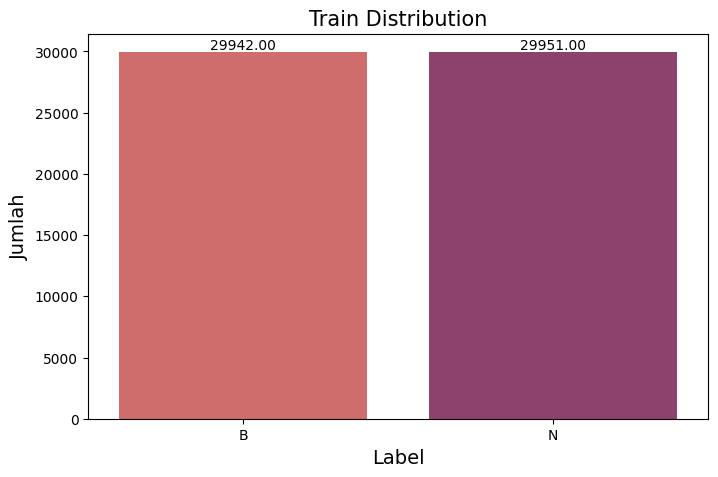

In [ ]:
# displays a visualization of the amount of data train
visualize_data(train_df, 'Train')

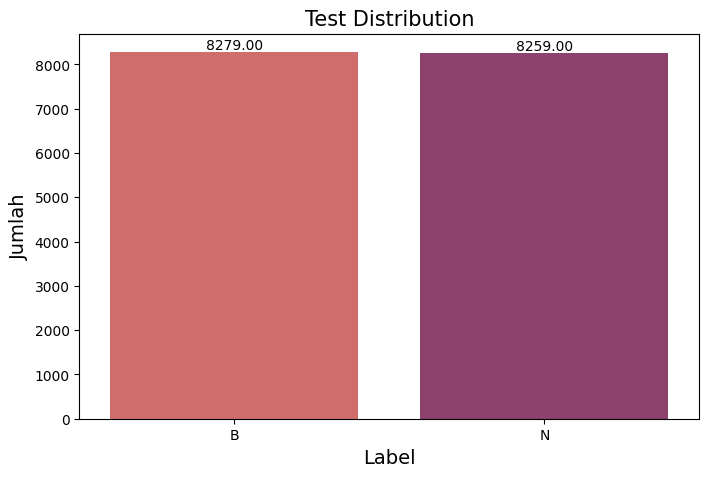

In [ ]:
# displays a visualization of the amount of data test
visualize_data(test_df, 'Test')

Analisis distribusi data:<br>
1. train-set: jumlah label yang terdapat pada label Biodegradable yaitu `29.942` dan label Non-Biodegradable yaitu `29.951`, keduanya hanya berselisih 9 data. Menurut Saya, perbedaannya tidak terlalu signifikan sehingga tidak akan berpengaruh terhadap nilai akurasi yang akan dihasilkan nantinya.<br>
2. test-set: jumlah label yang terdapat pada label Biodegradable yaitu `8.279` dan label Non-Biodegradable yaitu `8.259`, keduanya hanya berselisih 20 data saja. Perbedaannya juga tidak terlalu signifikan.<br>

Menurut Saya, persebaran label dalam tiap set data sudah cukup seimbang sehingga tidak perlu dilakukan handling.

## Menampilkan contoh gambar dari limbah Biodegradable dan Non-biodegradable

In [ ]:
# Defines an image instance for each label
bio_samples = (train_df[train_df['label']=="B"]['images'].iloc[:10]).tolist()
non_samples = (train_df[train_df['label']=='N']['images'].iloc[:10]).tolist()

# create a function to visualize the sample
def visualize_samples(samples):
    fig, ax = plt.subplots(nrows=2, ncols=5, figsize=(20,10))
    for i, sample in enumerate(samples):
        img = cv2.imread(sample)
        ax[i//5, i%5].set_title(sample.split('/')[-2])
        ax[i//5, i%5].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        ax[i//5, i%5].set_title(f'{img.shape}')
        ax[i//5, i%5].axis('off')
    plt.show()

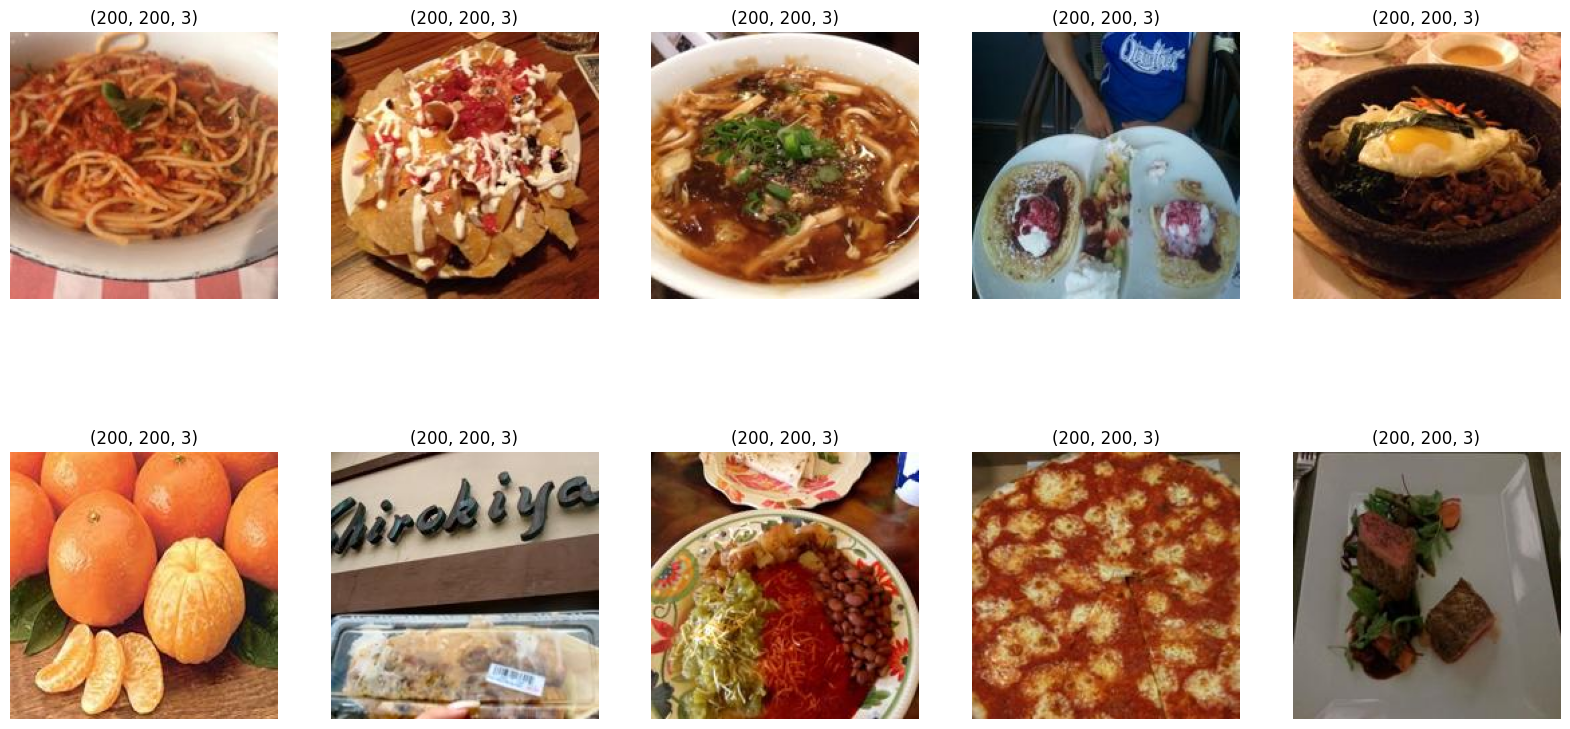

In [ ]:
# visualize Biodegradable samples
visualize_samples(bio_samples)

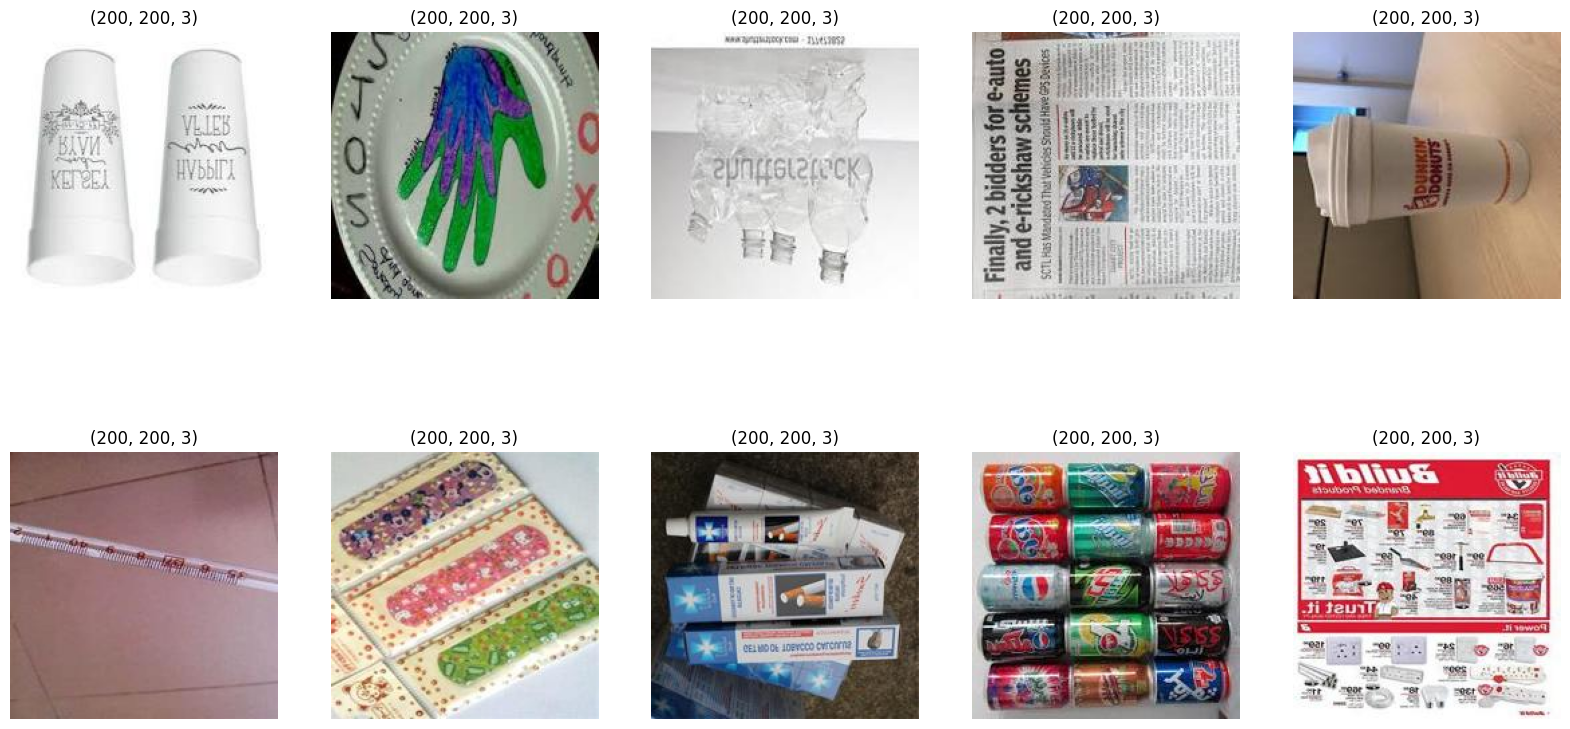

In [ ]:
# visualize Non-biodegradable samples
visualize_samples(non_samples)

Dari visualisasi sampel diatas, dapat dilihat bahwa:<br>
- Biodegradable merupakan bahan-bahan yang dapat terurai secara alami oleh mikroorganisme, seperti makanan/sisa makanan, sayuran, buah-buahan, dll. Limbah dari bahan ini dapat diolah menjadi kompos. Kemudian setiap gambar sample dari Biodegradable ini memiliki ukuran pixel yang sama (200, 200, 3).<br>
- Non-biodegradable merupakan bahan-bahan yang tidak dapat terurai secara alami, misalnya baterai, majalah, handuk, plastik, botol kaca, botol plastik, pulpen, kain, kaleng, koran, brosur, unsur anorganik, dll. Limbah dari bahan ini akan didaur ulang sehingga dapat dimanfaatkan kembali serta mengurangi pencemaran lingkungan. Kemudian setiap gambar sample dari Non-biodegradable ini memiliki ukuran pixel yang sama (200, 200, 3).

# v. Feature Engineering

>Bagian ini berisi proses penyiapan data untuk proses pelatihan model.

Feature Engineering yang dilakukan adalah:

1. Mengambil data untuk model inference
2. Mendefinisikan Fitur dan Target
3. Split Train-Set, Val-Set dan Test-Set
4. Augmentasi

## Mengambil data untuk model inference

In [ ]:
# Retrieving sample data for Model Inference

df_inf = train_df.sample(10, random_state=0)
df_inf

,images,label
10014,/content/images/TRAIN.1/N/TRAIN.1_NBIODEG_HFL_...,N
53814,/content/images/TRAIN.1/N/TRAIN.1_NBIODEG_HFL_...,N
38847,/content/images/TRAIN.1/N/TRAIN.1_NBIODEG_VFL_...,N
27829,/content/images/TRAIN.1/N/TRAIN.1_NBIODEG_CCW_...,N
10170,/content/images/TRAIN.1/B/TRAIN.1_BIODEG_ORI_1...,B
7416,/content/images/TRAIN.1/N/TRAIN.1_NBIODEG_ORI_...,N
2213,/content/images/TRAIN.1/N/TRAIN.1_NBIODEG_CWR_...,N
30970,/content/images/TRAIN.1/B/TRAIN.1_BIODEG_ORI_1...,B
20282,/content/images/TRAIN.1/B/TRAIN.1_BIODEG_ORI_1...,B
22652,/content/images/TRAIN.1/B/TRAIN.1_BIODEG_ORI_1...,B


In [ ]:
# Drop the Inference-Set data in the train-set

df_train = train_df.drop(df_inf.index)
df_train

,images,label
0,/content/images/TRAIN.1/B/TRAIN.1_BIODEG_ORI_1...,B
1,/content/images/TRAIN.1/B/TRAIN.1_BIODEG_ORI_3...,B
2,/content/images/TRAIN.1/B/TRAIN.1_BIODEG_ORI_2...,B
3,/content/images/TRAIN.1/B/TRAIN.1_BIODEG_ORI_8...,B
4,/content/images/TRAIN.1/B/TRAIN.1_BIODEG_ORI_1...,B
...,...,...
59888,/content/images/TRAIN.1/B/TRAIN.1_BIODEG_ORI_1...,B
59889,/content/images/TRAIN.1/B/TRAIN.1_BIODEG_ORI_2...,B
59890,/content/images/TRAIN.1/B/TRAIN.1_BIODEG_ORI_1...,B
59891,/content/images/TRAIN.1/B/TRAIN.1_BIODEG_ORI_1...,B


In [ ]:
# Reset index to minimize errors

df_train.reset_index(drop = True, inplace = True)
df_inf.reset_index(drop = True, inplace = True)
df_inf

,images,label
0,/content/images/TRAIN.1/N/TRAIN.1_NBIODEG_HFL_...,N
1,/content/images/TRAIN.1/N/TRAIN.1_NBIODEG_HFL_...,N
2,/content/images/TRAIN.1/N/TRAIN.1_NBIODEG_VFL_...,N
3,/content/images/TRAIN.1/N/TRAIN.1_NBIODEG_CCW_...,N
4,/content/images/TRAIN.1/B/TRAIN.1_BIODEG_ORI_1...,B
5,/content/images/TRAIN.1/N/TRAIN.1_NBIODEG_ORI_...,N
6,/content/images/TRAIN.1/N/TRAIN.1_NBIODEG_CWR_...,N
7,/content/images/TRAIN.1/B/TRAIN.1_BIODEG_ORI_1...,B
8,/content/images/TRAIN.1/B/TRAIN.1_BIODEG_ORI_1...,B
9,/content/images/TRAIN.1/B/TRAIN.1_BIODEG_ORI_1...,B


Setelah ini, Saya akan export data inference ke dalam format csv untuk dilakukan prediksi kedepannya di notebook yang berbeda.

In [ ]:
# Export data inference to csv
df_inf_csv = df_inf.to_csv('/content/data inference.csv', index=False)
df_inf_csv

## Mendefinisikan Fitur dan Target

In [ ]:
# fitur
X = 'images'
# target
y = 'label'

## Split Train-Set, Val-Set dan Test-Set

Pada dataset telah dipisahkan antara data train dan test tetapi belum dipisahkan untuk data validation. Oleh karena itu, di sini akan dilakukan split untuk data validation dari data train.

In [ ]:
# split data train and data val
train_df, val_df = train_test_split(df_train, train_size=0.9, random_state=23, stratify = df_train['label'])
print('Train Size : ', train_df.shape)
print('Val Size : ', val_df.shape)
print('Test Size: ', test_df.shape)

Train Size :  (53894, 2)
Val Size :  (5989, 2)
Test Size:  (16538, 2)


Berdasarkan informasi di atas, diketahui bahwa:<br>
- data Train-Set terdiri dari 53.894 baris dan 2 kolom.
- data Val-Set adalah 5.989 baris dan 2 kolom.
- data Test-Set adalah 16.538 baris dan 2 kolom.

In [ ]:
# Reset index to minimize errors

train_df.reset_index(drop = True, inplace = True)
val_df.reset_index(drop = True, inplace = True)

train_df

,images,label
0,/content/images/TRAIN.1/B/TRAIN.1_BIODEG_ORI_1...,B
1,/content/images/TRAIN.1/B/TRAIN.1_BIODEG_ORI_1...,B
2,/content/images/TRAIN.1/B/TRAIN.1_BIODEG_ORI_1...,B
3,/content/images/TRAIN.1/N/TRAIN.1_NBIODEG_ORI_...,N
4,/content/images/TRAIN.1/B/TRAIN.1_BIODEG_ORI_2...,B
...,...,...
53889,/content/images/TRAIN.1/B/TRAIN.1_BIODEG_ORI_5...,B
53890,/content/images/TRAIN.1/N/TRAIN.1_NBIODEG_CWR_...,N
53891,/content/images/TRAIN.1/N/TRAIN.1_NBIODEG_VFL_...,N
53892,/content/images/TRAIN.1/N/TRAIN.1_NBIODEG_CCW_...,N


## Augmentasi

Hal yang dilakukan pertama-tama yaitu menentukan ukuran panjang dan lebar untuk semua image sehingga ukuran input dan output sama. Tujuannya untuk mencengah terjadinya error saat data dilakukan training.

In [ ]:
# define height and width of image
height_img = 180
width_img = 180

# define random number
SEED = 23

# define batch
BATCH = 512

In [ ]:
# Data Augmentation

# Perform augmentation only on train-set
train_datagen= ImageDataGenerator(
              rescale= 1./255, #rescale
              rotation_range= 0.2, #rotasi
              width_shift_range= 0.2, #menggeser image dari total width
              height_shift_range=0.2, #menggeser image dari total height
              shear_range= 0.2, #mereganggkan image (bisa vertikal atau horizontal)
              zoom_range= 0.2, #memperbesar
              horizontal_flip= True, #pencerminan
              vertical_flip=True
              )

# Rescale the data validation
val_datagen= ImageDataGenerator(rescale= 1./255)

# Rescale the data test
test_datagen= ImageDataGenerator(rescale= 1./255)

Augmentasi merupakan suatu teknik untuk memperluas atau memperbesar data sehingga model dapat melakukan generalisasi. Hal ini dilakukan untuk mencegah adannya overfitting dan model mengenali pola yang bermacam-macam. Augmentasi yang dipilih pada kasus ini adalah :
- Rotasi gambar secara random sejauh 0.2 derajat.
- Menggeser gambar sebanyak 20% dari total width.
- Menggeser gambar sebanyak 20% dari total height.
- Tranvesi/memiringkan gambar sejauh 0.2 derajat.
- Zoom gambar sejauh 0.2.
- Melakukan horizontal flip pada gambar.
- Melakukan vertikal flip pada gambar.<br>

Augmentasi data hanya dilakukan pada data train, sedangkan untuk val-set dan test-set hanya dilakukan scaling. Karena data validasi dan data test digunakan untuk mengevaluasi model, yang berarti bahwa bentuk aslinya harus utuh untuk mendapatkan kinerja yang realistis dari model kita.

Sekarang, terapkan augmentasi yang dibuat kedalam dataframe.

In [ ]:
# data train
ds_train= train_datagen.flow_from_dataframe(
    dataframe= train_df,
    x_col= X,
    y_col= y,
    target_size= (height_img,width_img),
    class_mode= 'binary',
    batch_size= BATCH,
    shuffle= True, #shuffle hanya di data train
    seed= SEED)

# data validation
ds_val= val_datagen.flow_from_dataframe(
    dataframe= val_df,
    x_col= X,
    y_col= y,
    target_size= (height_img,width_img),
    class_mode= 'binary',
    batch_size= BATCH,
    shuffle= False,
    seed= SEED)

# data test
ds_test= test_datagen.flow_from_dataframe(
    dataframe= test_df,
    x_col= X,
    y_col= y,
    target_size= (height_img,width_img),
    class_mode= 'binary',
    batch_size= BATCH,
    shuffle= False,
    seed= SEED)

Found 53894 validated image filenames belonging to 2 classes.
Found 5989 validated image filenames belonging to 2 classes.
Found 16538 validated image filenames belonging to 2 classes.


In [ ]:
# Check the label and class of the label

train_class = ds_train.class_indices
print('Train Set Class Label : ', train_class)

val_class = ds_val.class_indices
print('Val Set Class Label : ', val_class)

test_class = ds_test.class_indices
print('Test Set Class Label : ', test_class)

Train Set Class Label :  {'B': 0, 'N': 1}
Val Set Class Label :  {'B': 0, 'N': 1}
Test Set Class Label :  {'B': 0, 'N': 1}


Dari informasi di atas, kita bisa melihat bahwa terdapat 2 label limbah pada setiap dataset, yaitu:<br>
- Untuk label `Biodegradable` diwakilkan dengan `0`
- Untuk label `Non-biodegradable` diwakilkan dengan `1`

# vi. Model Definition

>Bagian ini berisi cell untuk mendefinisikan model seperti alasan menggunakan suatu algoritma/model, hyperparameter yang dipakai, jenis penggunaan metrics yang dipakai.

Saya akan mendefinisikan Model CNN yang akan dibuat dengan menggunakan `Sequential API`.<BR>

**Alasan utama** menggunakan sequential API dalam model CNN adalah karena sequential API memudahkan dalam hal pembuatan arsitektur model yang sederhana dan mudah dipahami. Dengan menggunakan sequential API, kita dapat dengan mudah menambahkan lapisan-lapisan pemrosesan yang diperlukan untuk membuat model CNN, tanpa harus memikirkan bagaimana lapisan-lapisan tersebut terhubung satu sama lain. Selain itu, sequential API juga memungkinkan kita untuk dengan mudah mengatur urutan lapisan-lapisan yang akan diterapkan pada data, sehingga model yang dihasilkan dapat dioptimalkan untuk mencapai performa yang lebih baik.<br>

**Kelebihan** dari sequential API adalah sebagai berikut:<br>
- Mudah digunakan
- Mempermudah pengaturan urutan lapisan sehingga model yang dihasilkan dapat dioptimalkan untuk mencapai performa yang lebih baik
- Dapat menangani data dengan dimensi yang berbeda <br>

**Kekurangan** dari sequential API adalah sebagai berikut:<br>
- Keterbatasan dalam pembuatan arsitektur model, karena hanya dapat digunakan untuk membuat arsitektur model yang sederhana, maka kita tidak dapat membuat arsitektur model yang lebih kompleks dan kustom
- Tidak dapat menangani data dengan bentuk yang tidak teratur
- Membutuhkan lebih banyak waktu untuk pelatihan

In [ ]:
# defines input sizes
input = [height_img,width_img,3]

In [ ]:
# define input size
input = [height_img,width_img,3]

# define model
model = Sequential()
# convolution layer 1
model.add(Conv2D(filters=16, kernel_size=3, activation='relu', padding='same', input_shape= input))
model.add(MaxPooling2D(pool_size=2, strides=2))
# convolution layer 2
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(input)))
model.add(MaxPooling2D(pool_size=(2, 2)))
# flatten later
model.add(Flatten())
# hidden layer 1
model.add(Dense(16, activation='relu'))
# hidden layer 2
model.add(Dense(8, activation='relu'))
# output layer
model.add(Dense(1, activation='sigmoid'))

- Pertama, Saya akan **mendefinisikan model sequential** dan **memasukkan input** sesuai dengan shape dari dataframe.
- **Convolution layer (proses konvolusi)** merupakan perkalian antara matriks yaitu input dan nilai dari filter. <br>
  1. Convolution layer 1<br>
     Filter yang digunakan adalah `16` dan output fitur maps akan menghasilkan ukuran `3x3`. Activation function yang digunakan yaitu `relu`, dengan padding `same`. Selain itu digunakan pooling `(MaxPooling)` atau pengurangan dimensi dengan size `2x2` dengan strides `2`, hal ini dilakukan untuk mencari informasi fitur yang paling penting.<br>
  2. Convolution layer 2<br>
     Filter yang digunakan adalah `32` dan output fitur maps akan menghasilkan ukuran `3x3`. Activation function yang digunakan yaitu `relu`. Selain itu digunakan pooling `(MaxPooling)` atau pengurangan dimensi dengan size `2x2` dengan strides `2`.<br>
- **Flatten layer** digunakan untuk membentuk ulang feature maps menjadi sebuah vektor. Outputnya nanti akan dimasukkan dalam hidden layer.<br>
- **Hidden layer** pada model digunakan sebanyak 2 layer dengan neuron sebanyak `16` dan `8` dengan activation function `relu`. Ini merupakan full connected layer yang akan menghitung skor kelas.<br>
- **Output layer** berarti hasil klasifikasi dari kelas, hanya ada 1 neuron yang digunakan karena merupakan binary clasification yang mana hasilnya antara label 0 atau 1. Activation function yang digunakan adalah `sigmoid` karena merupakan binary classification.

In [ ]:
# compile
model.compile(loss='binary_crossentropy',
              optimizer="adam",
              metrics=['accuracy'])

Kompilasi model adalah proses menyiapkan model untuk pelatihan. Hal yang dilakukan pada proses kompilasi kali ini yaitu:<br>
- **Loss function** adalah fungsi yang digunakan untuk menghitung seberapa baik model memprediksi data. Loss function yang digunakan adalah `binary_crossentropy`, yang biasanya digunakan untuk klasifikasi biner (prediksi yang hanya memiliki dua kelas).<br>
- **Optimizer** adalah algoritma yang digunakan untuk menyesuaikan parameter model berdasarkan loss function yang dihitung. Dalam kasus ini, optimizer yang digunakan adalah `adam`. Adam adalah salah satu jenis optimizer yang digunakan karena kemampuannya untuk menyesuaikan learning rate secara efektif. <br>
- **Metrics** adalah fungsi yang digunakan untuk mengukur kinerja model. Dalam kasus ini, metric yang digunakan adalah `accuracy`, yang merupakan persentase sampel yang diprediksi dengan benar oleh model.

In [ ]:
# summary of model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 90, 90, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 88, 88, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 44, 44, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 61952)             0         
                                                                 
 dense (Dense)               (None, 16)                9

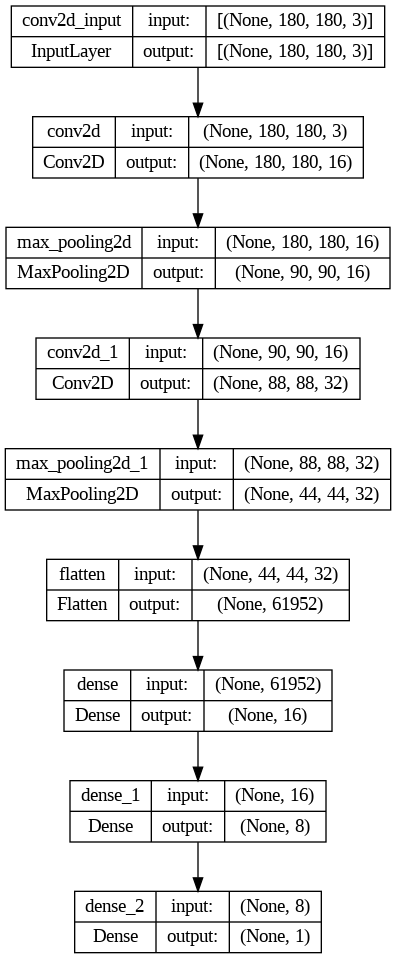

In [ ]:
# plot model
tf.keras.utils.plot_model(model, "model.png", show_shapes=True)

# vii. Model Training

>Bagian ini hanya berisi code untuk melatih model dan output yang dihasilkan. Lakukan beberapa kali proses training dengan hyperparameter yang berbeda untuk melihat hasil yang didapatkan. Analisis dan narasikan hasil ini pada bagian Model Evaluation.

Di sini, Saya akan mendefinisikan callbacks. **Callbacks** adalah parameter yang digunakan untuk menentukan tindakan-tindakan yang harus dilakukan selama pelatihan model. Dalam kasus ini, callbacks terdiri dari dua buah tindakan, yaitu `EarlyStopping` dan `ModelCheckpoint`.<br>
- **Early stopping** digunakan untuk menghentikan training jika val_loss tidak ada peningkatan.<br>
- **Model check point** digunakan untuk menyimpan model terbaik dengan monitoring dari nilai akurasi terbaik.

In [ ]:
# define callbacks
callbacks= [
            EarlyStopping(monitor= 'val_loss', mode='min', patience= 5, verbose=1),
            ModelCheckpoint('model_best.hdf5', monitor='accuracy', save_best_only= True)
]

Kemudian Saya akan melakukan training menggunaan model yang telah dibuat. Saya mendefinisikan `epochs = 30`.

In [ ]:
# training model with 30 epochs
history = model.fit(ds_train, 
                    epochs=30, 
                    validation_data=(ds_val),
                    batch_size= BATCH,
                    callbacks= callbacks,
                    verbose=1)

Epoch 1/30
106/106 [==============================] - 445s 4s/step - loss: 0.4598 - accuracy: 0.8048 - val_loss: 0.3304 - val_accuracy: 0.8706
Epoch 2/30
106/106 [==============================] - 445s 4s/step - loss: 0.3186 - accuracy: 0.8712 - val_loss: 0.2697 - val_accuracy: 0.8961
Epoch 3/30
106/106 [==============================] - 443s 4s/step - loss: 0.3025 - accuracy: 0.8769 - val_loss: 0.2685 - val_accuracy: 0.8973
Epoch 4/30
106/106 [==============================] - 443s 4s/step - loss: 0.2673 - accuracy: 0.8959 - val_loss: 0.2634 - val_accuracy: 0.9035
Epoch 5/30
106/106 [==============================] - 455s 4s/step - loss: 0.2540 - accuracy: 0.9023 - val_loss: 0.2411 - val_accuracy: 0.9135
Epoch 6/30
106/106 [==============================] - 446s 4s/step - loss: 0.2487 - accuracy: 0.9052 - val_loss: 0.2740 - val_accuracy: 0.8968
Epoch 7/30
106/106 [==============================] - 444s 4s/step - loss: 0.2477 - accuracy: 0.9051 - val_loss: 0.2320 - val_accuracy: 0.9162

Setelah itu, Saya akan memvisualisasikan hasil loss dan akurasi dari training model agar dapat diketahui model yang dibuat sudah baik dan tidak mengalami gradient desent.

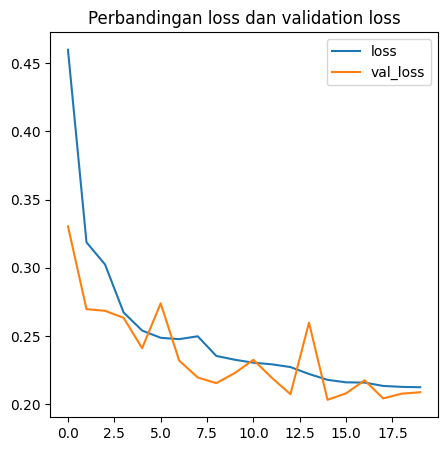

In [ ]:
# change to dataframe
metrics_model = pd.DataFrame(history.history)

# plot loss and validation loss
metrics_model[['loss', 'val_loss']].plot(figsize=(5,5))
plt.title('Perbandingan loss dan validation loss')
plt.show()

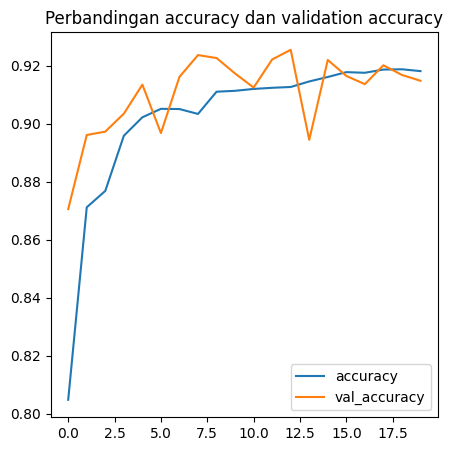

In [ ]:
# plot accuracy dan val_accuracy
metrics_model[['accuracy', 'val_accuracy']].plot(figsize=(5,5))
plt.title('Perbandingan accuracy dan validation accuracy')
plt.show()

Dari model yang telah dibuat diketahui bahwa:<br>
- Dari loss dan validation loss pada awalnya mengalami penurunan yang signifikan, tetapi setelah epoch ke-2 hingga 30 penurunan loss mengalami perubahan yang tidak terlalu signifikan.
- Dari segi akurasi, model terlihat cukup baik karena perubahan antara accuracy dan validation accuracy tidak terlalu signifikan.
- Diterapkan early stopping pada training model sehingga model berhenti training pada saat epoch ke-20.
- Perlu dilakukan model improvement agar meningkatkan stabilitas model serta meminimalisir adanya gradient desent.
- Perlu waktu yang cukup lama dalam proses training karena data train yang cukup banyak dan telah dilakukan augmentasi.

# viii. Model Evaluation

>Pada bagian ini, dilakukan evaluasi model yang harus menunjukkan bagaimana performa model berdasarkan metrics yang dipilih. Hal ini harus dibuktikan dengan visualisasi tren performa dan/atau tingkat kesalahan model. **Lakukan analisis terkait dengan hasil pada model dan tuliskan hasil analisisnya.**

In [ ]:
# define labels
num_label = ds_train.class_indices

# label from val-set and test-set
y_val = val_df['label'].copy().map(num_label).astype('int')
y_test = test_df['label'].copy().map(num_label).astype('int')

In [ ]:
# Model Evaluation of val-set
ds_val.reset()
y_pred_val = model.predict(ds_val, steps= len(ds_val))
# set threshold 0.5
y_pred_val = np.where(y_pred_val >= 0.5, 1, 0)
# result from classification report
print(classification_report(y_val, y_pred_val))

12/12 [==============================] - 11s 889ms/step
              precision    recall  f1-score   support

           0       0.95      0.87      0.91      2994
           1       0.88      0.96      0.92      2995

    accuracy                           0.91      5989
   macro avg       0.92      0.91      0.91      5989
weighted avg       0.92      0.91      0.91      5989



In [ ]:
# Model Evaluation of test-set
ds_test.reset()
y_pred_test = model.predict(ds_test, steps= len(ds_test))
# set threshold 0.5
y_pred_test = np.where(y_pred_test >= 0.5, 1, 0)
# result from classification report
print(classification_report(y_test, y_pred_test))

33/33 [==============================] - 34s 1s/step
              precision    recall  f1-score   support

           0       0.94      0.69      0.80      8279
           1       0.76      0.96      0.84      8259

    accuracy                           0.82     16538
   macro avg       0.85      0.82      0.82     16538
weighted avg       0.85      0.82      0.82     16538



- Karena data antara label 0 dan 1 ditunjukkan `balance` maka nilai metrics yang digunakan adalah `akurasi`. Terlihat bahwa nilai akurasi pada val-set yaitu `91%`, sedangkan nilai akurasi pada test-set yaitu `82%`. Hal ini menunjukkan bahwa model overfitting atau model masih buruk dalam melakukan klasifikasi secara benar pada data test.
- Digunakan threshold klasifikasi 0.5 untuk menghindari bias antar label kelas.

Confusion Matrix


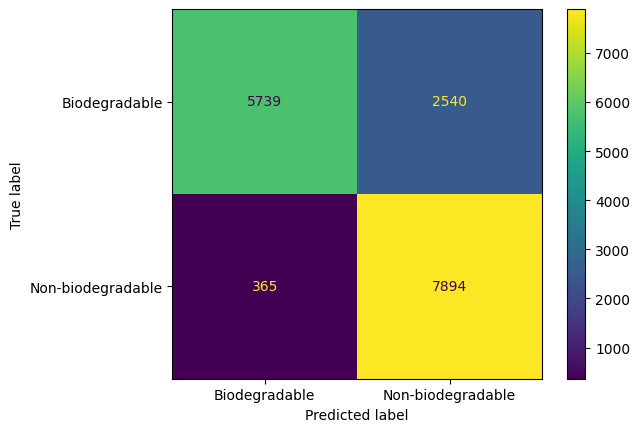

In [ ]:
# the results of the confusion matrix to see true positives and true negatives in the test-set
print('Confusion Matrix')
confmat = confusion_matrix(y_test, y_pred_test)
dispay = ConfusionMatrixDisplay(confusion_matrix=confmat, display_labels=['Biodegradable','Non-biodegradable'])
dispay.plot()
plt.show()

Confusion Matrix di atas menunjukan persebaran data hasil prediksi:
- 5739 label Biodegradable benar diprediksi sebagai Biodegradable
- 2540 label Biodegradable salah diprediksi sebagai Non-biodegradable
- 7894 label Non-biodegradable benar diprediksi sebagai Non-biodegradable
- 365 label Non-biodegradable salah diprediksi sebagai Biodegradable

## Model Improvement

Karena model sebelumnya masih mengalami overfit dalam hal akurasi, maka untuk model improvement Saya menggunakan **Transfer Learning**. Dimana pretrained model yang akan digunakan adalah **model Xception**.

In [ ]:
# define callbacks for transfer learning
callbacks2= [
            EarlyStopping(monitor= 'val_loss', mode='min', patience= 5, verbose=1),
            ModelCheckpoint('model2_best.hdf5', monitor='accuracy', save_best_only= True)
]

### Transfer Learning Xception

Saya akan menggunakan model **Xception** karena dinilai lebih efisien dari segi komputasi. Selain itu, Xception juga memiliki akurasi yang tinggi dibandingkan model lain pada dataset ImageNet, karena dibuat berdasarkan arsitektur Inception, tetapi dengan menggunakan *depthwise separable convolutions*.

In [ ]:
# clears running sessions on Keras
tf.keras.backend.clear_session()

Setelah ini adalah proses mendownload model Xception yang menggunakan weight imagenet dan menggunakan average pooling pada pooling layernya.

In [ ]:
# Load pretrained model
pretrained_model_Xception = tf.keras.applications.Xception(include_top=False, weights='imagenet', input_shape=input, pooling='avg')
pretrained_model_Xception.trainable = False

83683744/83683744 [==============================] - 3s 0us/step


Model pretrained ini akan digunakan pada bagian feature extraction saja, sedangkan pada bagian classification akan digunakan 2 hidden layer.

In [ ]:
# Create the model
model_Xception = Sequential()
model_Xception.add(pretrained_model_Xception)
model_Xception.add(Flatten())
model_Xception.add(Dense(128, activation='relu'))
model_Xception.add(Dense(128, activation='relu'))
model_Xception.add(Dense(1, activation='sigmoid'))

In [ ]:
# model summary
model_Xception.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 xception (Functional)       (None, 2048)              20861480  
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 128)               262272    
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dense_2 (Dense)             (None, 1)                 129       
                                                                 
Total params: 21,140,393
Trainable params: 278,913
Non-trainable params: 20,861,480
_________________________________________________________________


- Untuk model improvement, Saya menggunakan transfer learning yang sudah dibuat sesuai arsitektur di atas. Model transfer learning pertama menggunakan `Xception`. 
- Selanjutnya hasilnya akan di flatten yang kemudian masuk ke hidden layer pertama dengan jumlah neuron `128` dan activation function `relu`, lalu masuk ke hidden layer kedua dengan jumlah neuron `128` dan activation function `relu`.
- Terakhir menuju output layer dengan jumlah neuron `1` dan activation function `sigmoid` karena merupakan binary classification.

Model yang sudah diperbarui akan dicompile dengan menggunakan `Adamax` optimizer lalu dilatih dengan menambahkan callbacks `early stopping` untuk menghindari overfitting. Di sini akan dilakukan training model dengan `epochs = 25`.

In [ ]:
%%time
# Compile the model
model_Xception.compile(optimizer='adamax', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history_Xception = model_Xception.fit(ds_train, 
                      epochs=25, 
                      validation_data=ds_val,
                      batch_size= BATCH, 
                      callbacks= callbacks2, 
                      verbose=1)

Epoch 1/25
106/106 [==============================] - 573s 5s/step - loss: 0.1447 - accuracy: 0.9467 - val_loss: 0.0936 - val_accuracy: 0.9684
Epoch 2/25
106/106 [==============================] - 525s 5s/step - loss: 0.1059 - accuracy: 0.9615 - val_loss: 0.0959 - val_accuracy: 0.9666
Epoch 3/25
106/106 [==============================] - 512s 5s/step - loss: 0.0995 - accuracy: 0.9648 - val_loss: 0.0778 - val_accuracy: 0.9719
Epoch 4/25
106/106 [==============================] - 507s 5s/step - loss: 0.0913 - accuracy: 0.9672 - val_loss: 0.0795 - val_accuracy: 0.9708
Epoch 5/25
106/106 [==============================] - 507s 5s/step - loss: 0.0886 - accuracy: 0.9688 - val_loss: 0.0751 - val_accuracy: 0.9718
Epoch 6/25
106/106 [==============================] - 507s 5s/step - loss: 0.0857 - accuracy: 0.9698 - val_loss: 0.0721 - val_accuracy: 0.9724
Epoch 7/25
106/106 [==============================] - 503s 5s/step - loss: 0.0822 - accuracy: 0.9706 - val_loss: 0.0690 - val_accuracy: 0.9740

In [ ]:
# change to dataframe
metrics_model_Xception = pd.DataFrame(history_Xception.history)
metrics_model_Xception

,loss,accuracy,val_loss,val_accuracy
0,0.144719,0.946747,0.093646,0.968442
1,0.105942,0.961461,0.095886,0.966605
2,0.099538,0.964801,0.077783,0.971949
3,0.091316,0.967176,0.079514,0.970780
4,0.088647,0.968791,0.075057,0.971782
5,0.085682,0.969755,0.072099,0.972449
6,0.082230,0.970609,0.068996,0.973952
7,0.078663,0.971407,0.063049,0.976624
8,0.073306,0.973429,0.064679,0.975789
9,0.071325,0.974283,0.063160,0.976791


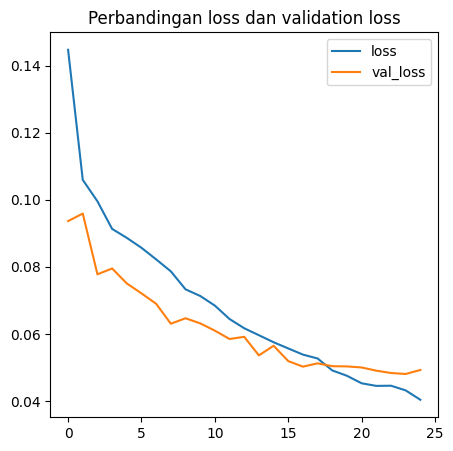

In [ ]:
# plot loss and validation loss
metrics_model_Xception[['loss', 'val_loss']].plot(figsize=(5,5))
plt.title('Perbandingan loss dan validation loss')
plt.show()

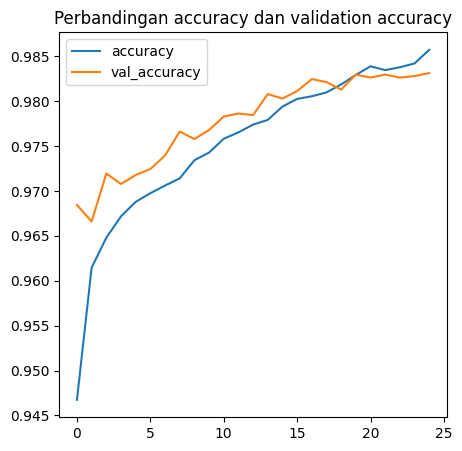

In [ ]:
# plot accuracy and val_accuracy
metrics_model_Xception[['accuracy', 'val_accuracy']].plot(figsize=(5,5))
plt.title('Perbandingan accuracy dan validation accuracy')
plt.show()

Dari model yang telah dibuat diketahui bahwa:<br>
- Dari loss dan validation loss terlihat sangat baik karena nilainya signifikan menurun di setiap epoch-nya. Pada epoch terakhir menunjukkan nilai loss yang sangat rendah. Kemudian loss pada validation-set mengikuti disekitar garis loss train-set sehingga gap tidak terlalu besar.
- Dari segi akurasi, model terlihat sangat baik karena perubahan antara accuracy dan validation accuracy signifikan meningkat di setiap epoch-nya. Pada epoch terakhir menunjukkan nilai akurasi yang sangat tinggi. Kemudian akurasi pada val-set mengikuti di sekitar garis train-set.
- Diterapkan early stopping pada training model tetapi training tetap berjalan hingga epoch ke-25, berarti perlunya tambahan jumlah epoch karena selama training weight masih terus mengalami perubahan penurunan loss dan peningkatan akurasi. Tapi di sini tidak dilakukan tambahan jumlah epoch karena memerlukan waktu training yang sangat lama.
- Perlu waktu yang sangat lama dalam proses training karena data train yang cukup banyak dan telah dilakukan augmentasi.

In [ ]:
# Model Evaluation of val-set
ds_val.reset()
y_pred_val_Xception = model_Xception.predict(ds_val, steps= len(ds_val))
# set threshold 0.5
y_pred_val_Xception = np.where(y_pred_val_Xception >= 0.5, 1, 0)
# result from classification report
print(classification_report(y_val, y_pred_val_Xception))

12/12 [==============================] - 16s 1s/step
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      2994
           1       0.98      0.98      0.98      2995

    accuracy                           0.98      5989
   macro avg       0.98      0.98      0.98      5989
weighted avg       0.98      0.98      0.98      5989



In [ ]:
# Model Evaluation of test-set
ds_test.reset()
y_pred_test_Xception = model_Xception.predict(ds_test, steps= len(ds_test))
# set threshold 0.5
y_pred_test_Xception = np.where(y_pred_test_Xception >= 0.5, 1, 0)
# result from classification report
print(classification_report(y_test, y_pred_test_Xception))

33/33 [==============================] - 49s 2s/step
              precision    recall  f1-score   support

           0       0.95      0.95      0.95      8279
           1       0.95      0.95      0.95      8259

    accuracy                           0.95     16538
   macro avg       0.95      0.95      0.95     16538
weighted avg       0.95      0.95      0.95     16538



- Berdasarkan hasil evaluasi model improvement ini terlihat bahwa nilai akurasi-nya yang jauh lebih besar dan nilai loss yang jauh lebih kecil dari model pertama. Nilai akurasi pada val-set adalah `98%` kemudian nilai akurasi pada test-set yaitu `95%`. Hal ini menunjukkan model sudah sangat baik dalam melakukan klasifikasi secara benar `(goodfit)`.
- Digunakan threshold klasifikasi 0.5 untuk menghindari bias antar label kelas.

Confusion Matrix


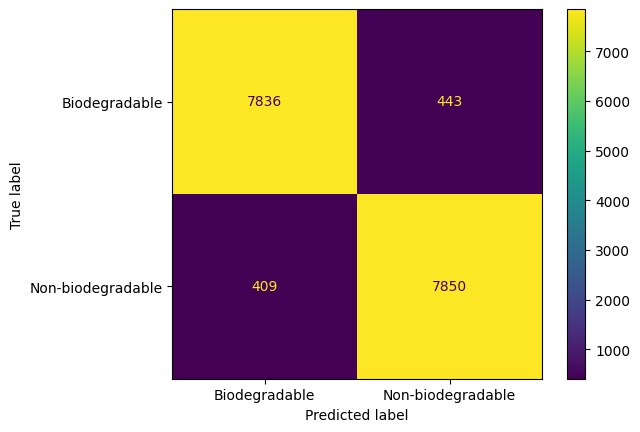

In [ ]:
# the results of the confusion matrix to see true positives and true negatives in the test-set
print('Confusion Matrix')
confmat_Xception = confusion_matrix(y_test, y_pred_test_Xception)
dispay_Xception = ConfusionMatrixDisplay(confusion_matrix=confmat_Xception, display_labels=['Biodegradable','Non-biodegradable'])
dispay_Xception.plot()
plt.show()

Kita dapat melihat bahwa dari hasil confusion matrix pada test-set menunjukkan bahwa terdapat:<br>
- 7836 label Biodegradable benar diprediksi sebagai Biodegradable
- 443 label Biodegradable salah diprediksi sebagai Non-biodegradable
- 7850 label Non-biodegradable benar diprediksi sebagai Non-biodegradable
- 409 label Non-biodegradable salah diprediksi sebagai Biodegradable<br>

# ix. Model Saving

>Pada bagian ini, dilakukan proses penyimpanan model dan file-file lain yang terkait dengan hasil proses pembuatan model. Pilihlah 1 arsitektur ANN yang terbaik berdasarkan hasil evaluasi sebelumnya.

In [ ]:
# Summary of model Xception

model_Xception.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 xception (Functional)       (None, 2048)              20861480  
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 128)               262272    
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dense_2 (Dense)             (None, 1)                 129       
                                                                 
Total params: 21,140,393
Trainable params: 278,913
Non-trainable params: 20,861,480
_________________________________________________________________


In [ ]:
# Freeze Model

model_Xception.trainable = False
model_Xception.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 xception (Functional)       (None, 2048)              20861480  
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 128)               262272    
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dense_2 (Dense)             (None, 1)                 129       
                                                                 
Total params: 21,140,393
Trainable params: 0
Non-trainable params: 21,140,393
_________________________________________________________________


In [ ]:
# Save CNN Model

model_Xception.save('model.h5')

# x. Model Inference (`notebook terpisah`)

>Model yang sudah dilatih akan dicoba pada data yang bukan termasuk ke dalam train-set, val-set, ataupun test-set. Data ini harus dalam format yang asli, bukan data yang sudah di-scaled.

Pada bagian ini akan dilakukan proses model inference dengan menggunakan data `inference set` dan melakukan preprocessing yang sama seperti yang dilakukan sebelumnya serta melakukan prediksi terhadap data `inference-set`.

# xi. Pengambilan Kesimpulan

>Pada bagian terakhir ini, harus berisi kesimpulan yang mencerminkan hasil yang didapat dengan objective yang sudah ditulis di bagian pengenalan.

Pada Milestone 2 ini dibuat model `computer vision` menggunakan CNN untuk melakukan `klasifikasi gambar`. Dataset yang digunakan adalah `Non and Biodegradable Material Dataset` yang telah terpisah antara direktori test dan train. Untuk data train hanya dipilih salah satu direktori yaitu `TRAIN.1` dengan ekstensi `.jpg`.

**EDA** <br>

- Dari proses EDA dapat diketahui bahwa jumlah label Biodegradable dan Non-biodegradable memiliki jumlah yang `balance` karena perbedaan antar keduanya tidak signifikan.<br>
  1. train-set: jumlah label yang terdapat pada label Biodegradable yaitu `29.942` dan label Non-Biodegradable yaitu `29.951`, keduanya hanya berselisih 9 data. Menurut Saya, perbedaannya tidak terlalu signifikan sehingga tidak akan berpengaruh terhadap nilai akurasi yang akan dihasilkan nantinya.<br>
  2. test-set: jumlah label yang terdapat pada label Biodegradable yaitu `8.279` dan label Non-Biodegradable yaitu `8.259`, keduanya hanya berselisih 20 data saja. Perbedaannya juga tidak terlalu signifikan.<br>
- Dari visualisasi sample untuk kelas Biodegradable dapat diketahui bahwa kelas ini merupakan bahan organik seperti makanan/sisa makanan, sayuran, buah-buahan, dll yang dapat diuraikan oleh mikroorganisme. Sedangkan untuk kelas Non-biodegradable merupakan sampah yang sebagian besar dapat dimanfaatkan kembali atau daur ulang seperti baterai, majalah, handuk, plastik, botol kaca, botol plastik, pulpen, kain, kaleng, koran, brosur, unsur anorganik, dll.<br>
- Label Biodegradable diwakilkan oleh `0` dan Non-biodegradable diwakilkan oleh `1`.

**Preprosessing** <br>

Pada proses preprocessing dilakukan `rescaling` pada semua ukuran gambar menjadi `180x180` agar saat gambar masuk proses training model tidak terjadi error karena perbedaan ukuran gambar. Disini juga dilakukan augmentasi pada data train berupa `rotation, width shift, height shift, shear, zoom, horizontal flip, vertical flip, rescale pixel`. Tetapi untuk data test-set dan val-set hanya dilakukan rescale pixel. Karena data validasi dan data test digunakan untuk mengevaluasi model, yang berarti bahwa bentuk aslinya harus utuh untuk mendapatkan kinerja yang realistis dari model kita.

**Model** <br>

**Sequential API**<br>
Arsitektur model:<br>
- Pertama, Saya **mendefinisikan model sequential** dan **memasukkan input** sesuai dengan shape dari dataframe.<br>
- **Convolution layer (proses konvolusi)** merupakan perkalian antara matriks yaitu input dan nilai dari filter. <br>
  1. Convolution layer 1<br>
     Filter yang digunakan adalah `16` dan output fitur maps akan menghasilkan ukuran `3x3`. Activation function yang digunakan yaitu `relu`, dengan padding `same`. Selain itu digunakan pooling `(MaxPooling)` atau pengurangan dimensi dengan size `2x2` dengan strides `2`, hal ini dilakukan untuk mencari informasi fitur yang paling penting.<br>
  2. Convolution layer 2<br>
     Filter yang digunakan adalah `32` dan output fitur maps akan menghasilkan ukuran `3x3`. Activation function yang digunakan yaitu `relu`. Selain itu digunakan pooling `(MaxPooling)` atau pengurangan dimensi dengan size `2x2` dengan strides `2`.<br>
- **Flatten layer** digunakan untuk membentuk ulang feature maps menjadi sebuah vektor. Outputnya nanti akan dimasukkan dalam hidden layer.<br>
- **Hidden layer** pada model digunakan sebanyak 2 layer dengan neuron sebanyak `16` dan `8` dengan activation function `relu`. Ini merupakan full connected layer yang akan menghitung skor kelas.<br>
- **Output layer** berarti hasil klasifikasi dari kelas, hanya ada 1 neuron yang digunakan karena merupakan binary clasification yang mana hasilnya antara label 0 atau 1. Activation function yang digunakan adalah `sigmoid` karena merupakan binary classification.
- Training dengan `epochs = 30`.<br>

Kompilasi model:<br>
- **Loss function** adalah fungsi yang digunakan untuk menghitung seberapa baik model memprediksi data. Loss function yang digunakan adalah `binary_crossentropy`, yang biasanya digunakan untuk klasifikasi biner (prediksi yang hanya memiliki dua kelas).<br>
- **Optimizer** adalah algoritma yang digunakan untuk menyesuaikan parameter model berdasarkan loss function yang dihitung. Dalam kasus ini, optimizer yang digunakan adalah `adam`. Adam adalah salah satu jenis optimizer yang digunakan karena kemampuannya untuk menyesuaikan learning rate secara efektif. <br>
- **Metrics** adalah fungsi yang digunakan untuk mengukur kinerja model. Dalam kasus ini, metric yang digunakan adalah `accuracy`, yang merupakan persentase sampel yang diprediksi dengan benar oleh model.<br>

Callbacks:<br>
Callbacks terdiri dari dua buah tindakan, yaitu `EarlyStopping` dan `ModelCheckpoint`.<br>
- **Early stopping** digunakan untuk menghentikan training jika val_loss tidak ada peningkatan.<br>
- **Model check point** digunakan untuk menyimpan model terbaik dengan monitoring dari nilai akurasi terbaik.<br>

Dari model yang telah dibuat diketahui bahwa:<br>
- Dari loss dan validation loss pada awalnya mengalami penurunan yang signifikan, tetapi setelah epoch ke-2 hingga 30 penurunan loss mengalami perubahan yang tidak terlalu signifikan.<br>
- Dari segi akurasi, model terlihat cukup baik karena perubahan antara accuracy dan validation accuracy tidak terlalu signifikan.<br>
- Diterapkan early stopping pada training model sehingga model berhenti training pada saat epoch ke-20.<br>
- Perlu dilakukan model improvement agar meningkatkan stabilitas model serta meminimalisir adanya gradient desent.<br>
- Perlu waktu yang cukup lama dalam proses training karena data train yang cukup banyak dan telah dilakukan augmentasi.<br>

Evaluasi model dan confusion matrix:<br>
- Karena data antara label 0 dan 1 ditunjukkan `balance` maka nilai metrics yang digunakan adalah `akurasi`. Nilai akurasi pada val-set yaitu `91%`, sedangkan nilai akurasi pada test-set yaitu `82%`. Hal ini menunjukkan bahwa model overfitting atau model masih buruk dalam melakukan klasifikasi secara benar pada data test.<br>
- Digunakan threshold klasifikasi 0.5 untuk menghindari bias antar label kelas.<br>
- Confusion Matrix menunjukan persebaran data hasil prediksi:<br>
  - 5739 label Biodegradable benar diprediksi sebagai Biodegradable<br>
  - 2540 label Biodegradable salah diprediksi sebagai Non-biodegradable<br>
  - 7894 label Non-biodegradable benar diprediksi sebagai Non-biodegradable<br>
  - 365 label Non-biodegradable salah diprediksi sebagai Biodegradable<br>


**Model Improvement**<br>
Saya menggunakan Transfer Learning. Dimana pretrained model yang digunakan adalah model Xception.<br>
Arsitektur model:<br>
- Untuk model improvement, Saya menggunakan transfer learning yang sudah dibuat sesuai arsitektur-nya. Model transfer learning pertama menggunakan `Xception`.<br>
- Selanjutnya hasilnya di flatten yang kemudian masuk ke hidden layer pertama dengan jumlah neuron `128` dan activation function `relu`, lalu masuk ke hidden layer kedua dengan jumlah neuron `128` dan activation function `relu`.<br>
- Terakhir menuju output layer dengan jumlah neuron `1` dan activation function `sigmoid` karena merupakan binary classification.<br>
- Training dengan `epochs = 25`.<br>

Kompilasi model:<br>
- **Loss function** yang digunakan adalah `binary_crossentropy`, yang biasanya digunakan untuk klasifikasi biner (prediksi yang hanya memiliki dua kelas).<br>
- **Optimizer** yang digunakan adalah `Adamax`.<br>
- **Metrics** yang digunakan adalah `accuracy`, yang merupakan persentase sampel yang diprediksi dengan benar oleh model.<br>

Callbacks:<br>
Callbacks yang digunakan yaitu `EarlyStopping` dan `ModelCheckpoint`.<br>

Dari model yang telah dibuat diketahui bahwa:<br>
- Dari loss dan validation loss terlihat sangat baik karena nilainya signifikan menurun di setiap epoch-nya. Pada epoch terakhir menunjukkan nilai loss yang sangat rendah. Kemudian loss pada validation-set mengikuti disekitar garis loss train-set sehingga gap tidak terlalu besar.<br>
- Dari segi akurasi, model terlihat sangat baik karena perubahan antara accuracy dan validation accuracy signifikan meningkat di setiap epoch-nya. Pada epoch terakhir menunjukkan nilai akurasi yang sangat tinggi. Kemudian akurasi pada val-set mengikuti di sekitar garis train-set.<br>
- Diterapkan early stopping pada training model tetapi training tetap berjalan hingga epoch ke-25, berarti perlunya tambahan jumlah epoch karena selama training weight masih terus mengalami perubahan penurunan loss dan peningkatan akurasi. Tapi di sini tidak dilakukan tambahan jumlah epoch karena memerlukan waktu training yang sangat lama.<br>
- Perlu waktu yang sangat lama dalam proses training karena data train yang cukup banyak dan telah dilakukan augmentasi.<br>

Evaluasi model dan confusion matrix:<br>
- Berdasarkan hasil evaluasi model improvement ini terlihat bahwa nilai akurasi-nya yang jauh lebih besar dan nilai loss yang jauh lebih kecil dari model pertama. Nilai akurasi pada val-set adalah `98%` kemudian nilai akurasi pada test-set yaitu `95%`. Hal ini menunjukkan model sudah sangat baik dalam melakukan klasifikasi secara benar `(goodfit)`.<br>
- Digunakan threshold klasifikasi 0.5 untuk menghindari bias antar label kelas.<br>
- Confusion matrix pada test-set menunjukkan bahwa terdapat:<br>
  - 7836 label Biodegradable benar diprediksi sebagai Biodegradable<br>
  - 443 label Biodegradable salah diprediksi sebagai Non-biodegradable<br>
  - 7850 label Non-biodegradable benar diprediksi sebagai Non-biodegradable<br>
  - 409 label Non-biodegradable salah diprediksi sebagai Biodegradable<br>

**Model Terbaik** yang digunakan untuk mengklasifikasikan gambar pada data inference dan model deployment kedepannya adalah model yang sudah dilakukan improvement menggunakan transfer learning `model Xception`.

Melalui **percobaan model di data inference**, kita dapat mengetahui bagaimana keakuratan model mengklasifikasikan gambar apakah limbah termasuk material Biodegradable atau Non-biodegradable. Kita dapat melihat bahwa tidak ada perbedaan antara hasil prediksi dengan data aktual. Artinya, model ini sudah bagus untuk mengklasifikasikan limbah termasuk material Biodegradable atau Non-biodegradable dan bisa digunakan oleh beberapa negara untuk memaksimalkan pengelolaan limbah.<br>
Hal ini dapat dibuktikan juga pada proses evaluasi model sebelumnya, kita mendapatkan bahwa model ini memiliki performansi terbaik mencapai `akurasi 95-98%` setelah dilakukan improvement.

**Secara keseluruhan** model yang dibuat sudah cukup baik. Namun masih ada kesalahan model untuk mengklasifikasikan beberapa gambar. Sehingga, perlunya dilakukan eksplorasi lebih lanjut untuk menenemukan arsitektur model terbaik untuk dataset ini. Hal yang perlu diperhatikan adalah peningkatan akurasi dari model karena untuk pengaplikasian klasifikasi deteksi gambar jika masih salah dalam melakukan deteksi maka limbah akan tetap tercampur dan sulit diolah.<br>
Beberapa hal yang masih menjadi kendala adalah proses training yang cukup lama dan terbatasnya kemampuan device sehingga kurangnya proses eksplorasi lebih lanjut. 